# Logistic Regression

Logistic regression, or logit regression, or logit model is a regression model where the dependent variable is categorical. Thus, the logit model is a classification algorithm, and it generally assumes a binary dependent variable or, in the case of multinomial logistic regression, it predicts a multi-class dependent variable. The model can be summarized by the following equation:
![](extras/logistic_reg.PNG)

Here, the dependent variable is the logit function, which is defined as the log of the odds ratio:
![alt](extras/logit.PNG)

What this means is that for a given variable x (let's assume it's a dummy variable), w is the log of [the odds of the outcome given presence of variable x over the odds of the outcome given the absence of variable x].

The probability that a particular sample belongs to class 1 given the set of features x is determined by the _logistic function_, also known as the Sigmoid function. The Sigmoid function transforms the output so that it is constrained between 0 and 1. It can be represented as:
![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/5e648e1dd38ef843d57777cd34c67465bbca694f)

Let's briefly illustrate the Sigmoid function by looking at the range of -7 to 7. 

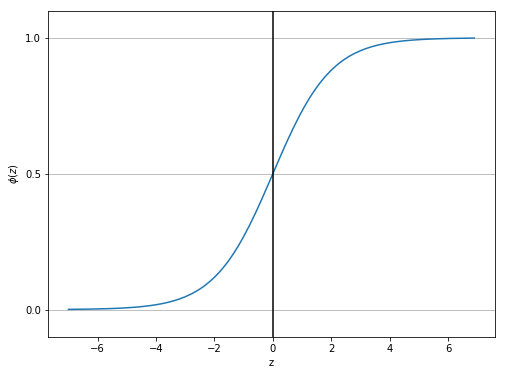

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.figure(figsize=(8, 6))
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

Generally, the algorithm will predict a class of 1 for all probabilities greater than .5 and a class of 0 for probabilities less than .5. 

Because the model can be expressed as a generalized linear model, for 0 < p < 1, ordinary least squares can suffice, with R-squared as the measure of goodness of fit in the fitting space. When p = 0 or 1, more complex methods are required. The regression coefficients are usually estimated using maximum likelihood estimation. Unlike linear regression with normally distributed residuals, it is not possible to find a closed-form expression for the coefficient values that maximize the likelihood function, so that an iterative process must be used instead.

## Coding Example

In this example, we will use the Titanic dataset in order to predict the survival of the passengers. 

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import sys
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Data/titanic_train.csv')

X = pd.concat([pd.get_dummies(data['Sex'], drop_first=True),data['Fare']], axis=1)
y = data['Survived']

In [3]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X, y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

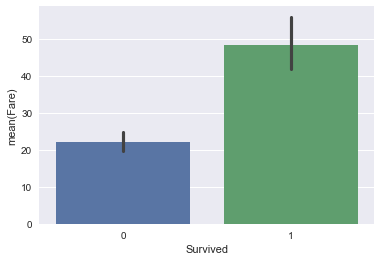

In [4]:
sns.barplot(x='Survived', y='Fare', data=data)

In [5]:
print confusion_matrix(y, lr.predict(X))
print '\n', classification_report(y, lr.predict(X))

[[462  87]
 [107 235]]

             precision    recall  f1-score   support

          0       0.81      0.84      0.83       549
          1       0.73      0.69      0.71       342

avg / total       0.78      0.78      0.78       891



Let's see how our model approximated the logistic function by ordering and plotting the predicted probabilies for all of our samples:

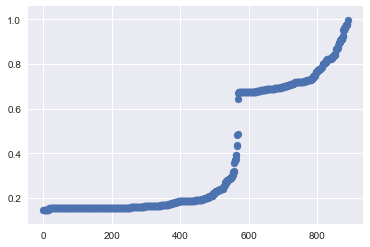

In [10]:
plt.scatter(np.arange(0, len(X)), np.sort(lr.predict_proba(X)[:,1]))

## Interpreting the coefficients

Let's take a look at the coefficients of the model:

In [11]:
print 'Intercept is', lr.intercept_[0]
print '\nCoefficient for male is', lr.coef_[0][0]
print '\nCoefficient for fare is', lr.coef_[0][1]

Intercept is 0.646993127807

Coefficient for male is -2.42261991302

Coefficient for fare is 0.0112144292596


The coeffient represent the log of the odds ratio. The intercept can be be interpreted as the log of the odds ratio for a female with a fare of zero. To arrive at the actual odds ratio, we must exponentiate the intercept:

In [12]:
np.exp(lr.intercept_[0])

1.90978969335834

What this means is that odds ratio of survival for a female with a fare of zero with respect to a male is 1.9 to 1. We can easily caculate the probability of survival using algebra to get: 

In [13]:
x = np.exp(lr.intercept_[0])
p = x/(1+x)
print 'Probability of survival is', p

Probability of survival is 0.656332551358


Similarly, we can arrive at this number by using our logistic function:

In [14]:
print 'Probability of survival is', np.exp(lr.intercept_[0])/(np.exp(lr.intercept_[0])+1)

Probability of survival is 0.656332551358


Similarly, we can interpret the coefficient for male as the log of the odds ratio for males with respect to female while holding fare constant. Doing the math, we get:

In [15]:
print 'The odds ratio for survival of males over survival of females is', np.exp(lr.coef_[0][0])

The odds ratio for survival of males over survival of females is 0.0886889554663


Thus, we can say that holding fare constant, the odds of a male surviving over the odds of a female surviving is .089. In terms of percent change, we can say that the odds for males surviving are, (.089-1)\*(100) = -91.1%, meaning 91.1% lower than the odds for females.

In [16]:
y[X['male']==1].mean()/y[X['male']==0].mean()

0.2545800760184765

Lastly, looking at the coefficient for fare, let's take the exponent of that:

In [129]:
print np.exp(lr.coef_[0][1])

1.01127754669


What this means is that holding gender constant, a one unit increase in the fare will result a 1.13% increase in the odds off survival. 

## References
- https://en.wikipedia.org/wiki/Logistic_regression
- http://www.ats.ucla.edu/stat/mult_pkg/faq/general/odds_ratio.htm
- Raschka, Sebastian. Python Machine Learning. Packt Publishing, 2015, Birmingham, UK.